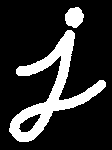

In [9]:
from PIL import Image
import numpy as np


def rgb2gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray


def gray2binary(gray):
    return (127 < gray) & (gray <= 255)




def dilation(image,kernel):
    output = np.zeros_like(image)
    padding = np.zeros((image.shape[0] + kernel.shape[0] - 1, image.shape[1] + kernel.shape[1] - 1))
    #padding[kernel.shape[0] - 2:-1:, kernel.shape[1] - 2:-1:] = image
    padding[kernel.shape[0]-2:kernel.shape[0]-2+image.shape[0],kernel.shape[1]-2:kernel.shape[1]-2+image.shape[1]]=image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            res = (kernel * padding[y: y + kernel.shape[0], x: x + kernel.shape[1]]).sum()
            if res > 0:
                output[y, x] = 1
            else:
                output[y, x] = 0
    return output
    

structured = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]])

img = "morphological.png"
im = gray2binary(rgb2gray(np.array(Image.open(img))))
#ime = erosion(im, structured)
imd = dilation(im,structured) 
#eroded = Image.fromarray(ime).convert('RGB')
dilated = Image.fromarray(imd).convert('RGB')
#eroded.show()
#dilated.show()
#eroded.save('eroded.png')
dilated.save('dilated.png')
#Image.open('eroded.png')
Image.open('dilated.png')